In [1]:
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import jacobian
from scipy.linalg import solve

In [2]:
def f1(x):
    return np.array([x[0] - x[1], x[0] * x[1]])

f1_jacob = jacobian(f1)

In [3]:
def f2(x):
    return np.arctan(x)

In [4]:
def broydens_method(func, x, max_iter=1e4, tol=1e-10):
    jacobian_cost = jacobian(func)
    n = len(x)

    x_prev = None
    f_prev = None

    x_new = x.copy()
    f_new = func(x_new)

    Q = jacobian_cost(x_new)    
    n_iter = 0

    x_hist = [x_new]

    while n_iter < max_iter and np.linalg.norm(f_new) > tol:
        dx = solve(Q, -f_new)
        x_prev = x_new.copy()
        x_new = x_new + dx

        f_prev = f_new.copy()
        f_new = func(x_new)

        b = f_new - f_prev

        Q = Q + (b - Q @ dx).reshape(n, 1) @ dx.reshape(1, n) / (dx @ dx)

        x_hist.append(x_new)

    return x_hist


In [5]:
x_hist = broydens_method(f1, np.array([1., 1.]))

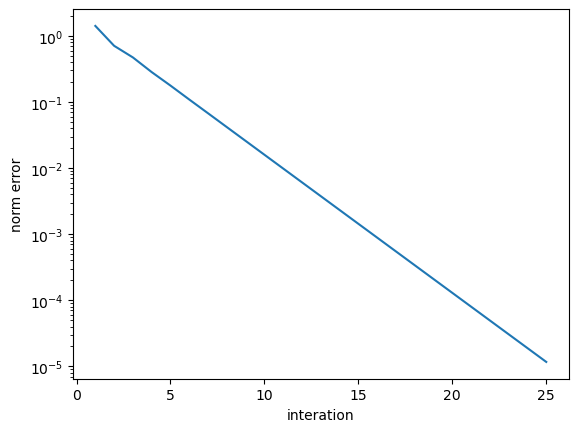

In [6]:
plt.plot(np.arange(len(x_hist)) + 1, list(map(np.linalg.norm, x_hist)))
plt.yscale('log')
plt.xlabel('interation')
plt.ylabel('norm error')
plt.show()

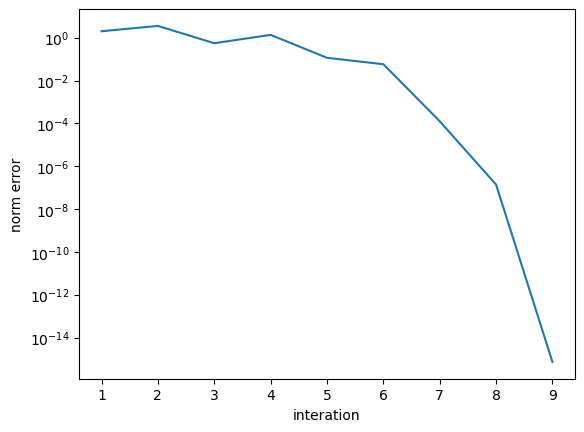

In [7]:
x_hist = broydens_method(f2, np.array([2.]))
plt.plot(np.arange(len(x_hist)) + 1, list(map(np.linalg.norm, x_hist)))
plt.yscale('log')
plt.xlabel('interation')
plt.ylabel('norm error')
plt.show()

In [31]:
def broydens_method_armijo(func, x, alpha, beta, sigma, max_iter=1e4, tol=1e-10):
    jacobian_cost = jacobian(func)
    n = len(x)

    x_prev = None
    f_prev = None

    x_new = x.copy()
    f_new = func(x_new)

    Q = jacobian_cost(x_new)    
    n_iter = 0

    x_hist = [x_new]

    while n_iter < max_iter and np.linalg.norm(f_new) > tol:
        dx = solve(Q, -f_new)

        x_prev = x_new.copy()
        
        alpha_k = alpha

        while np.any(np.abs(f_new - func(x_new + alpha_k * dx)) / alpha_k < -sigma * Q @ dx):
            alpha_k *= beta

        x_new = x_new + alpha_k * dx

        f_prev = f_new.copy()
        f_new = func(x_new)

        b = f_new - f_prev

        Q = Q + (b - Q @ dx).reshape(n, 1) @ dx.reshape(1, n) / (dx @ dx)

        x_hist.append(x_new)

    return x_hist


In [32]:
x_hist = broydens_method_armijo(f1, np.array([1., 1.]), 1, 0.8, 0.5)

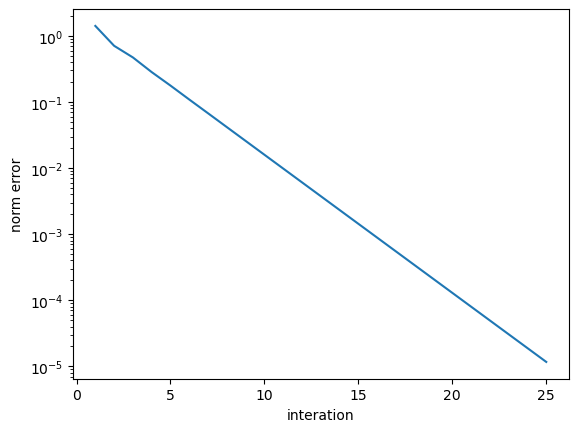

In [33]:
plt.plot(np.arange(len(x_hist)) + 1, list(map(np.linalg.norm, x_hist)))
plt.yscale('log')
plt.xlabel('interation')
plt.ylabel('norm error')
plt.show()

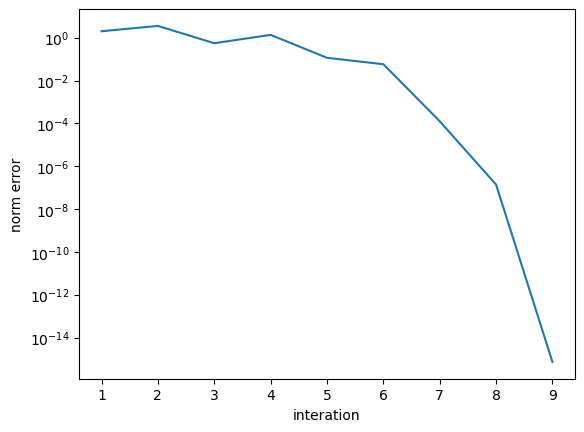

In [37]:
x_hist = broydens_method_armijo(f2, np.array([2.]), 1, 0.8, 0.5)
plt.plot(np.arange(len(x_hist)) + 1, list(map(np.linalg.norm, x_hist)))
plt.yscale('log')
plt.xlabel('interation')
plt.ylabel('norm error')
plt.show()